In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Goal:**
- Create a model (using decision trees) that estimates 'Survived' (target / label / class) using numerical columns in the dataframe as features.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Sex'])
df['Sex_Binary'] = le.transform(df['Sex'])

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df_without_na = df[['Survived', 'Sex_Binary','Pclass', 'Age', 'SibSp', 'Parch']].dropna()

In [7]:
y = df_without_na['Survived']

In [8]:
X = df_without_na[['Sex_Binary', 'Pclass', 'Age', 'SibSp', 'Parch']]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_Binary  714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.5 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.8)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

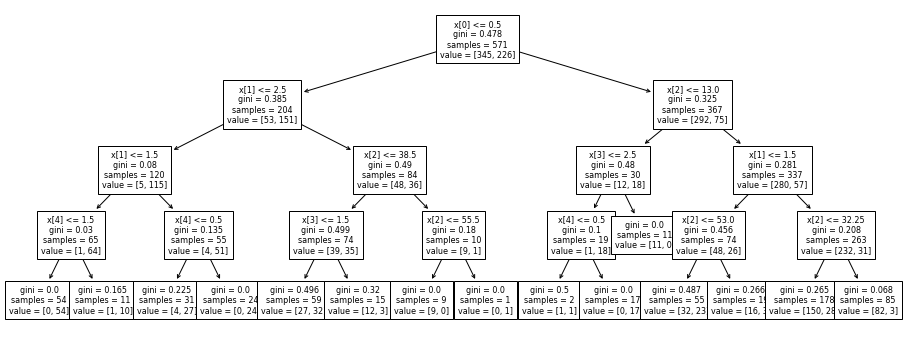

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plot_tree(clf, fontsize=8);

In [16]:
X_test.iloc[0]

Sex_Binary     0.0
Pclass         3.0
Age           28.0
SibSp          1.0
Parch          1.0
Name: 423, dtype: float64

In [17]:
clf.predict([X_test.iloc[0]])

/home/nobleprog/Desktop/ml-bespoke/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
max_depths = [2,4,6,8,10,12,14,16,18,20,22,24]
scores = []

In [19]:
for md in max_depths:
    clf = DecisionTreeClassifier(max_depth=md, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

Text(0, 0.5, 'DT Score')

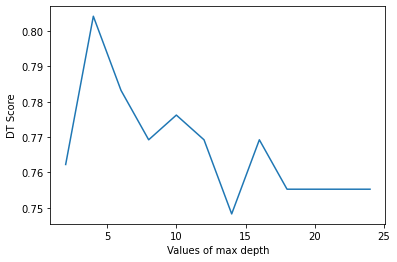

In [20]:
plt.plot(max_depths,scores)
plt.xlabel('Values of max depth')
plt.ylabel('DT Score')
#plt.xlim(1,25)
#plt.ylim(0.5,0.75)

In [21]:
scores

[0.7622377622377622,
 0.8041958041958042,
 0.7832167832167832,
 0.7692307692307693,
 0.7762237762237763,
 0.7692307692307693,
 0.7482517482517482,
 0.7692307692307693,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552]

In [22]:
# BEST PARAMETER FOUND: max_depth = 4. We train now the best model
best_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [23]:
y_pred = best_clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[70,  9],
       [19, 45]])

In [26]:
70+45+9+19

143

In [27]:
(70+45)/143

0.8041958041958042

**Remark:** For your model to be better than random, the accuracy score (implemented in the .score method of clf) should be at least 1/num_categories.

## Random Forests

- Collection of decision trees with small depth.
- Prediction (y) is the aggregated prediction of each individual estimator (i.e. decision trees with small depth). 

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=0)

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)

In [31]:
y_pred = rf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.7832167832167832

In [34]:
rf.score(X_test,y_test)

0.7832167832167832

In [35]:
rf.feature_importances_

array([0.44835149, 0.23738493, 0.1771158 , 0.0745628 , 0.06258497])

In [36]:
rf.feature_names_in_

array(['Sex_Binary', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype=object)

In [37]:
sum(rf.feature_importances_)

1.0000000000000002